In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# Load the dataset
file_path = r"C:\Users\goura\Desktop\PythonProjects\kNN\Iris.csv"
df = pd.read_csv(file_path)

In [6]:
# Drop the 'Id' column if exists
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

In [8]:
# Map class labels to numerical values
df['Species'] = df['Species'].astype('category').cat.codes

In [10]:
# Features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Implement k-NN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Predictions
y_pred = knn.predict(X_test)

In [18]:
# Compute classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [20]:
# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[8 0 0]
 [0 7 2]
 [0 0 6]]

Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.78      0.88         9
           2       0.75      1.00      0.86         6

    accuracy                           0.91        23
   macro avg       0.92      0.93      0.91        23
weighted avg       0.93      0.91      0.91        23



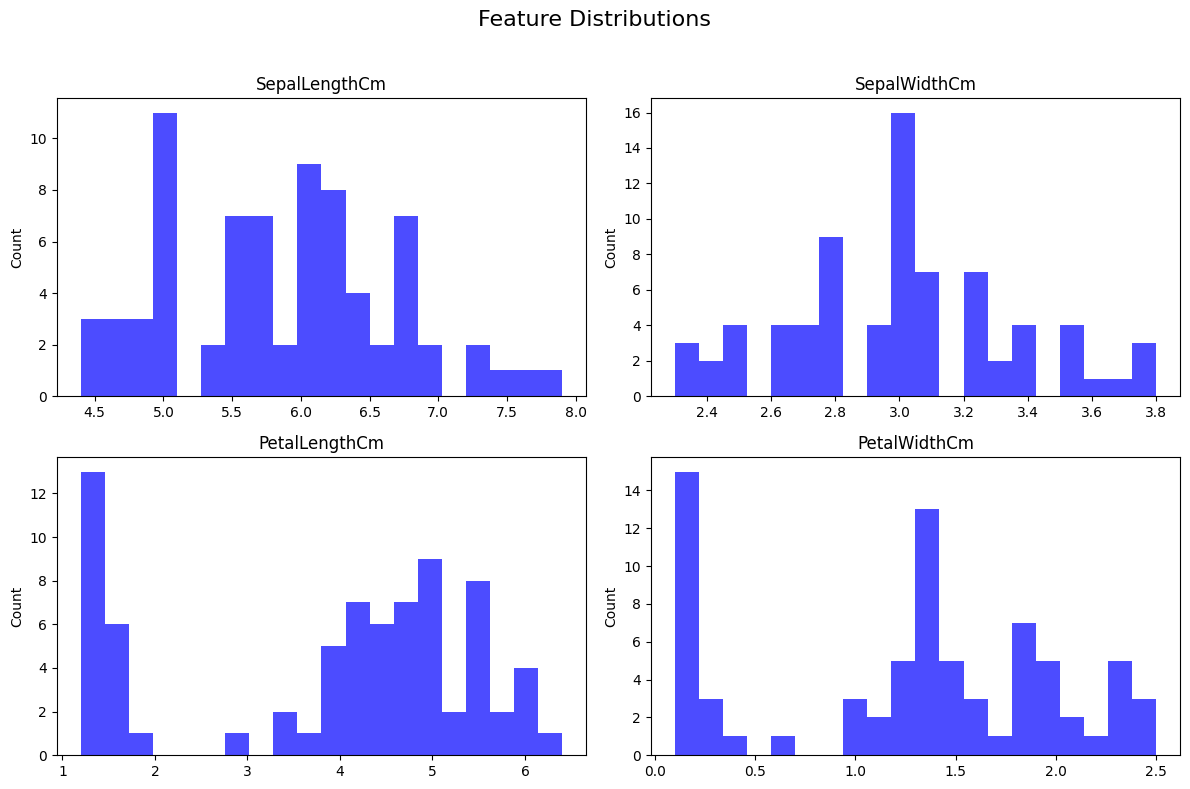

In [22]:
#Visualization - Distribution Graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
fig.suptitle("Feature Distributions", fontsize=16)

feature_columns = df.columns[:-1]  # Exclude 'Species'

for i, col in enumerate(feature_columns):
    row, col_num = divmod(i, 2)  # Get subplot position
    axes[row, col_num].hist(df[col], bins=20, color='blue', alpha=0.7)
    axes[row, col_num].set_title(col, fontsize=12)
    axes[row, col_num].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing
plt.show()

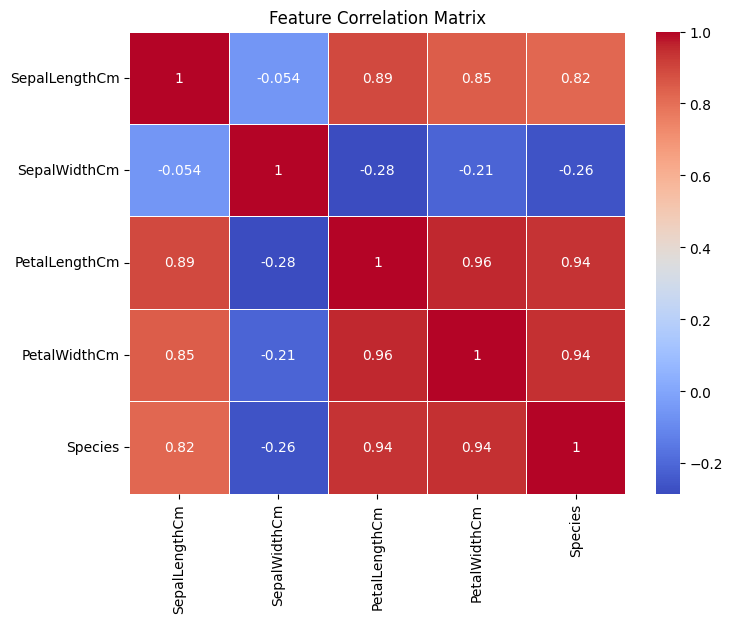

In [24]:
#Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

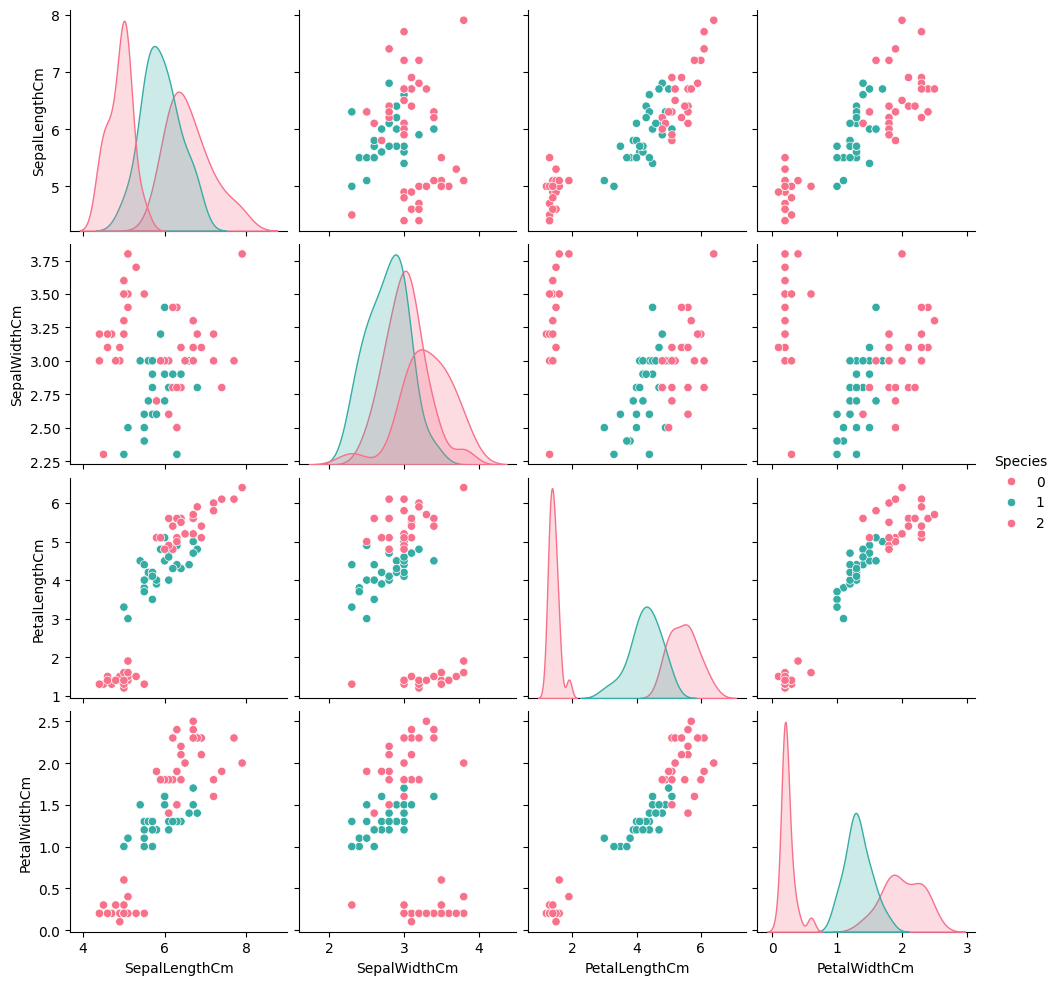

In [26]:
#Scatter Density Plot
sns.pairplot(df, hue='Species', palette="husl")
plt.show()